In [154]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("dataset_focus_session.csv")


C:\Users\priya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (25,174,176,178,179,181) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [155]:
#Renaming the WC07021 into Industry:
df.rename(columns = {'WC07021' : 'INDUSTRY'}, inplace = True)

<AxesSubplot:>

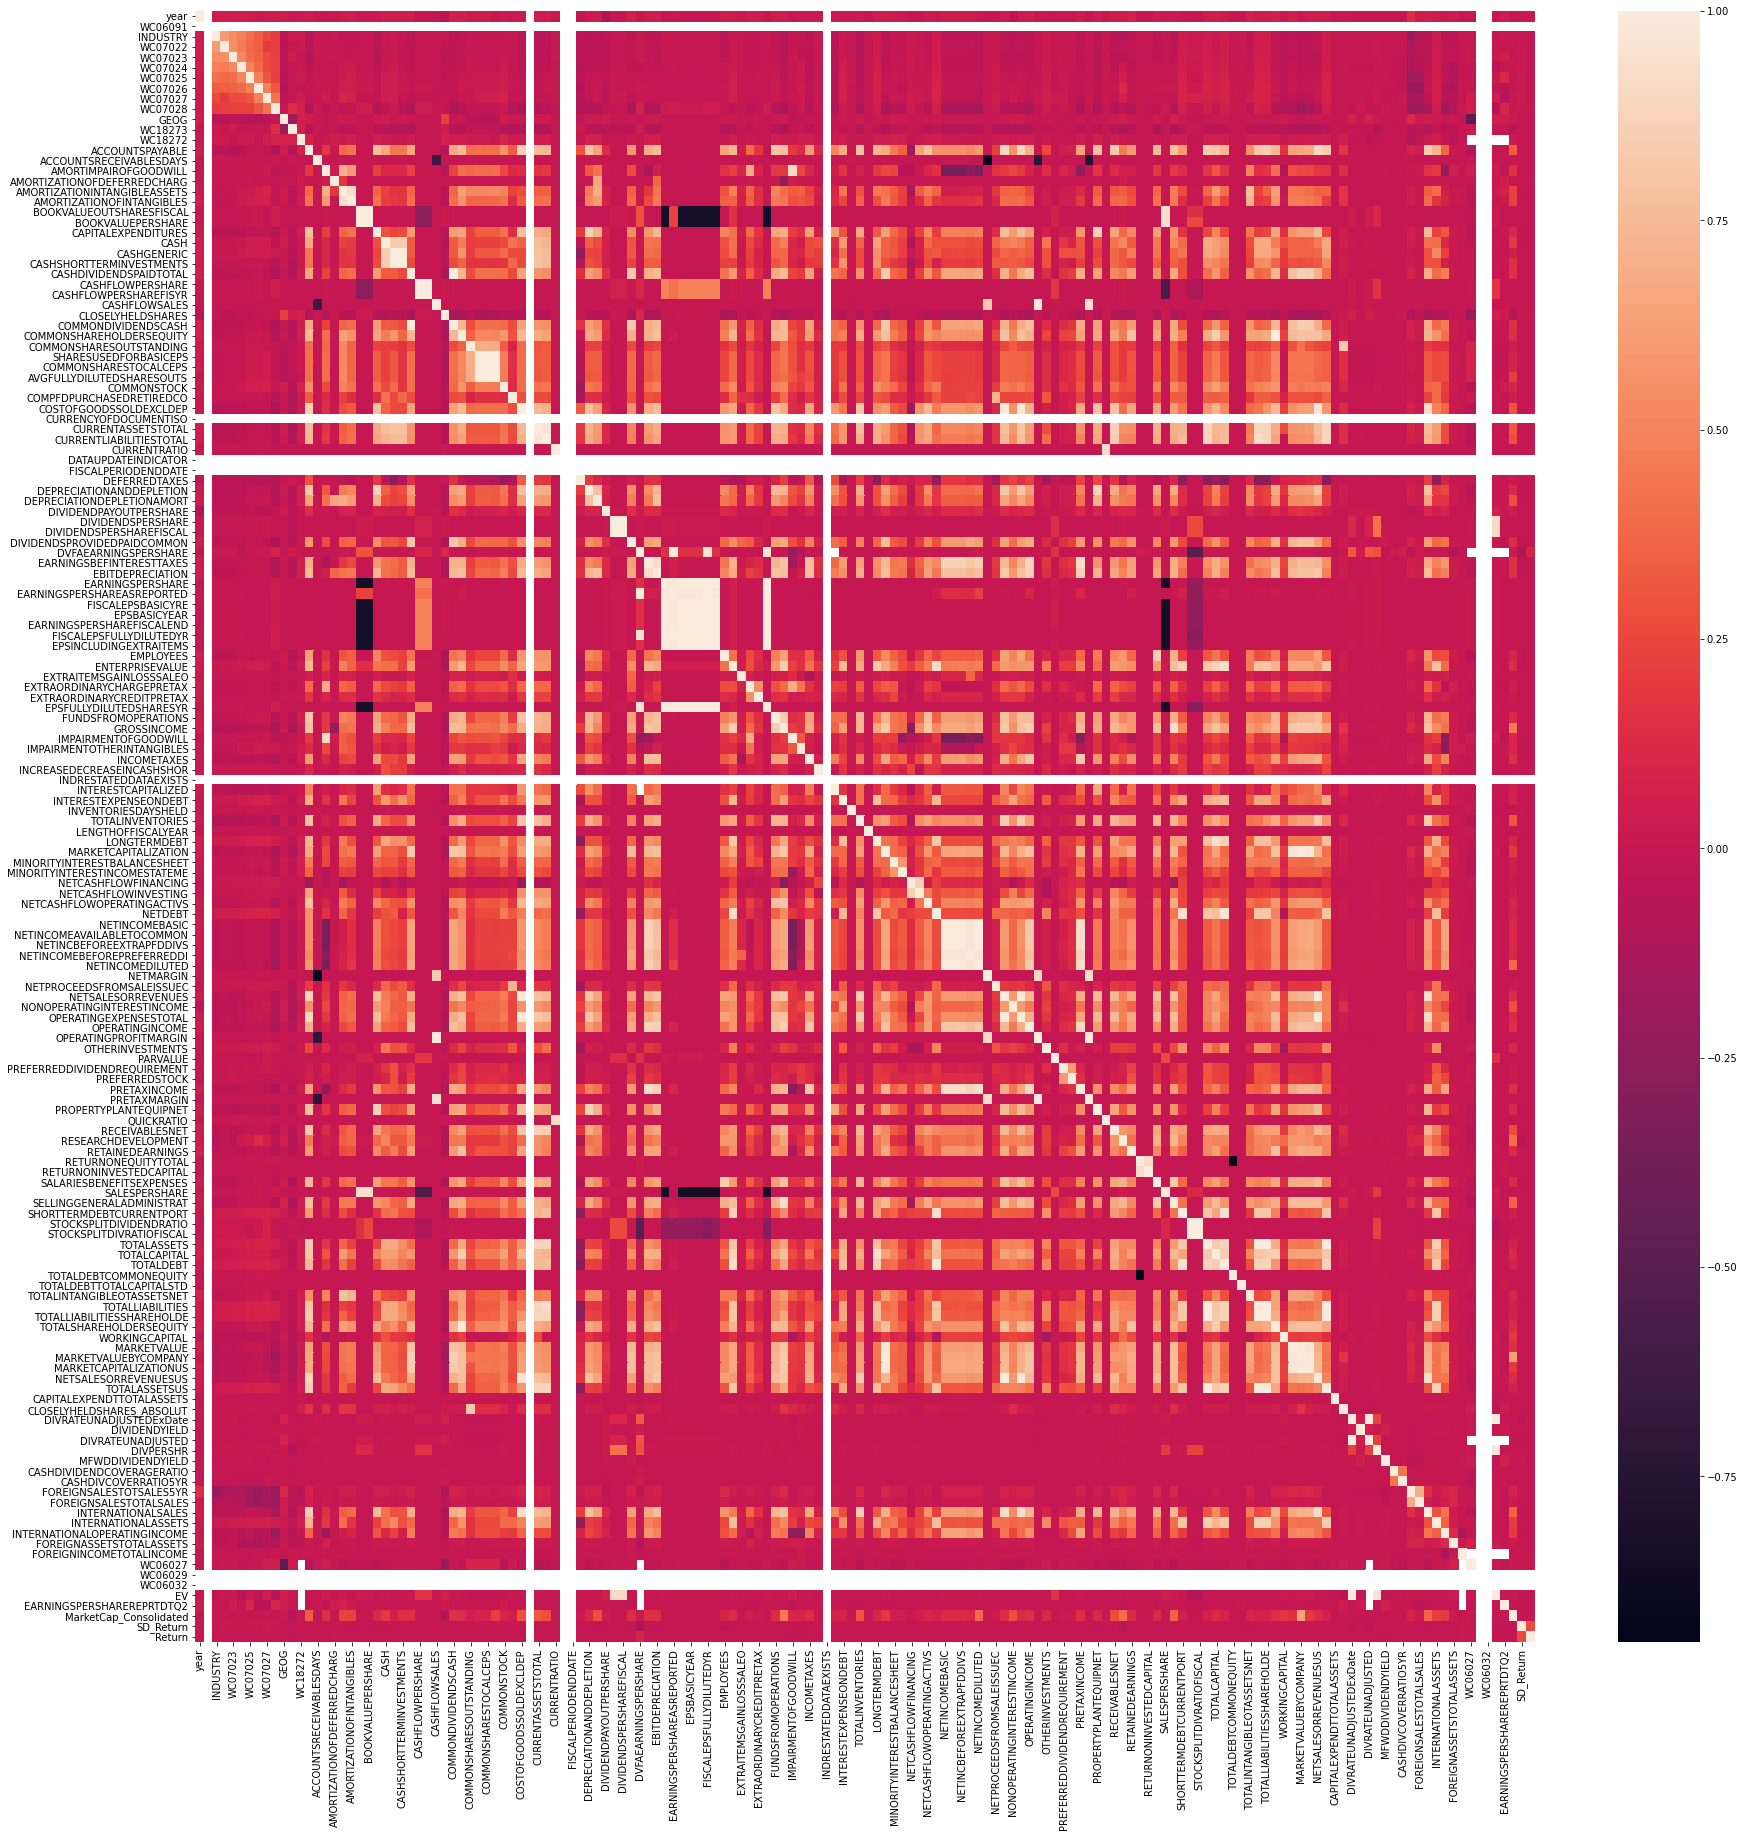

In [156]:
#Heatmap to reduce dimensions for knn-imputation and classification and while performing FA
plt.figure(figsize = (30,30))
sns.heatmap(df.corr())

In [157]:
# Obtaining correlations in descending order-
pd.set_option('display.max_rows', None)
corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

STOCKSPLITDIVIDENDRATIO        STOCKSPLITDIVRATIOFISCAL         1.000000e+00
STOCKSPLITDIVRATIOFISCAL       STOCKSPLITDIVIDENDRATIO          1.000000e+00
EPSBASICYEAR                   EARNINGSPERSHARE                 1.000000e+00
EARNINGSPERSHARE               EPSBASICYEAR                     1.000000e+00
EPSBASICYEAR                   EARNINGSPERSHAREFISCALEND        1.000000e+00
EARNINGSPERSHAREFISCALEND      EPSBASICYEAR                     1.000000e+00
EARNINGSPERSHARE               FISCALEPSBASICYRE                1.000000e+00
FISCALEPSBASICYRE              EARNINGSPERSHARE                 1.000000e+00
FISCALEPSFULLYDILUTEDYR        EPSFULLYDILUTEDSHARESYR          1.000000e+00
EPSFULLYDILUTEDSHARESYR        FISCALEPSFULLYDILUTEDYR          1.000000e+00
OTHERINVESTMENTS               OTHERINVESTMENTS                 1.000000e+00
PARVALUE                       PARVALUE                         1.000000e+00
PREFERREDDIVIDENDREQUIREMENT   PREFERREDDIVIDENDREQUIREMENT     1.000000e+00

In [158]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [159]:
import pingouin as pg
df.rcorr(stars=False)
df[['CASHFLOWPERSHARE', 'INCREASEDECREASEINCASHSHOR', 'CASHFLOWPERSHAREFISYR', 'EMPLOYEES', 'NETCASHFLOWINVESTING']].rcorr()

C:\Users\priya\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


CASHFLOWPERSHARE INCREASEDECREASEINCASHSHOR  \
CASHFLOWPERSHARE                          -                              
INCREASEDECREASEINCASHSHOR              0.0                          -   
CASHFLOWPERSHAREFISYR                   1.0                        0.0   
EMPLOYEES                              -0.0                      0.067   
NETCASHFLOWINVESTING                    0.0                     -0.037   

                           CASHFLOWPERSHAREFISYR EMPLOYEES  \
CASHFLOWPERSHARE                             ***             
INCREASEDECREASEINCASHSHOR                             ***   
CASHFLOWPERSHAREFISYR                          -             
EMPLOYEES                                   -0.0         -   
NETCASHFLOWINVESTING                         0.0     0.178   

                           NETCASHFLOWINVESTING  
CASHFLOWPERSHARE                                 
INCREASEDECREASEINCASHSHOR                  ***  
CASHFLOWPERSHAREFISYR                            
EMPLOYEES                                   ***  
NETCASHFLOWINVESTING                          -

In [160]:
df.iloc[:, 0:188].rcorr()

C:\Users\priya\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


year WC06091 INDUSTRY WC07022 WC07023  \
year                                -              ***     ***     ***   
WC06091                           nan       -                            
INDUSTRY                        0.035     nan        -     ***     ***   
WC07022                         0.045     nan    0.612       -     ***   
WC07023                         0.054     nan    0.543   0.546       -   
WC07024                         0.057     nan    0.477   0.465   0.522   
WC07025                         0.037     nan     0.41    0.39   0.404   
WC07026                         0.019     nan    0.339   0.343   0.351   
WC07027                         0.026     nan    0.262     0.2   0.271   
WC07028                         0.033     nan    0.206   0.217   0.224   
GEOG                            0.053     nan   -0.046  -0.055  -0.041   
WC18273                         0.007     nan    0.022    0.01   0.035   
WC18272                         0.013     nan    0.032   0.022  -0.008   
ACCOUNTSPAYABLE                 0.044     nan   -0.064  -0.047  -0.075   
ACCOUNTSRECEIVABLESDAYS         0.005     nan    0.005   0.006  -0.001   
AMORTIMPAIROFGOODWILL           0.002     nan   -0.007  -0.006   0.007   
AMORTIZATIONOFDEFERREDCHARG     0.007     nan    0.004  -0.003   0.005   
AMORTIZATIONINTANGIBLEASSETS    0.031     nan   -0.023  -0.012  -0.008   
AMORTIZATIONOFINTANGIBLES       0.046     nan   -0.025  -0.013  -0.004   
BOOKVALUEOUTSHARESFISCAL        0.005     nan   -0.002  -0.011    -0.0   
BOOKVALUEPERSHARE               0.005     nan   -0.002  -0.011  -0.001   
CAPITALEXPENDITURES             0.023     nan   -0.058  -0.042  -0.058   
CASH                            0.049     nan   -0.006   0.009  -0.001   
CASHGENERIC                     0.056     nan    0.011    0.02   0.018   
CASHSHORTTERMINVESTMENTS        0.037     nan   -0.014  -0.007  -0.016   
CASHDIVIDENDSPAIDTOTAL          0.061     nan   -0.046  -0.027  -0.034   
CASHFLOWPERSHARE               -0.004     nan     -0.0   0.003  -0.004   
CASHFLOWPERSHAREFISYR          -0.004     nan     -0.0   0.003  -0.004   
CASHFLOWSALES                  -0.003     nan   -0.002  -0.005  -0.004   
CLOSELYHELDSHARES              -0.067     nan   -0.007  -0.034  -0.035   
COMMONDIVIDENDSCASH             0.062     nan   -0.047  -0.028  -0.034   
COMMONSHAREHOLDERSEQUITY        0.069     nan   -0.027  -0.013  -0.015   
COMMONSHARESOUTSTANDING         0.029     nan   -0.012   0.005   0.001   
SHARESUSEDFORBASICEPS           0.037     nan   -0.019   0.003  -0.005   
COMMONSHARESTOCALCEPS           0.036     nan   -0.019   0.003  -0.005   
AVGFULLYDILUTEDSHARESOUTS       0.009     nan   -0.024  -0.003  -0.012   
COMMONSTOCK                     0.026     nan    0.001   0.006   0.005   
COMPFDPURCHASEDRETIREDCO        0.013     nan   -0.004  -0.002  -0.006   
COSTOFGOODSSOLDEXCLDEP           0.02     nan   -0.065  -0.047  -0.072   
CURRENCYOFDOCUMENTISO             nan     nan      nan     nan     nan   
CURRENTASSETSTOTAL              0.046     nan   -0.059  -0.045  -0.069   
CURRENTLIABILITIESTOTAL         0.045     nan   -0.046  -0.035  -0.053   
CURRENTRATIO                    0.006     nan    0.003  -0.001   0.007   
DATAUPDATEINDICATOR               nan     nan      nan     nan     nan   
FISCALPERIODENDDATE               nan     nan      nan     nan     nan   
DEFERREDTAXES                  -0.026     nan   -0.038  -0.037  -0.048   
DEPRECIATIONANDDEPLETION         0.03     nan   -0.064  -0.046  -0.064   
DEPRECIATIONDEPLETIONAMORT      0.034     nan   -0.048  -0.034  -0.039   
DIVIDENDPAYOUTPERSHARE         -0.115     nan   -0.032  -0.041  -0.039   
DIVIDENDSPERSHARE              -0.003     nan   -0.003  -0.004  -0.001   
DIVIDENDSPERSHAREFISCAL        -0.003     nan   -0.003  -0.005  -0.002   
DIVIDENDSPROVIDEDPAIDCOMMON     0.061     nan   -0.041  -0.022  -0.026   
DVFAEARNINGSPERSHARE            0.002     nan    0.009   0.011   0.016   
EARNINGSBEFINTERESTTAXES        0.035

In [161]:
from sklearn import datasets

In [162]:
#Drop out highly correlated features:
#https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python (also 2 commands below)
cor_matrix = df.corr().abs()
print(); print(cor_matrix)


                                   year  WC06091  INDUSTRY   WC07022  \
year                           1.000000      NaN  0.034609  0.045333   
WC06091                             NaN      NaN       NaN       NaN   
INDUSTRY                       0.034609      NaN  1.000000  0.611573   
WC07022                        0.045333      NaN  0.611573  1.000000   
WC07023                        0.054394      NaN  0.543039  0.545680   
WC07024                        0.056752      NaN  0.477177  0.465378   
WC07025                        0.037299      NaN  0.409554  0.390404   
WC07026                        0.019273      NaN  0.338876  0.343128   
WC07027                        0.026481      NaN  0.261581  0.200376   
WC07028                        0.033446      NaN  0.206124  0.217497   
GEOG                           0.053005      NaN  0.045517  0.055120   
WC18273                        0.007359      NaN  0.021943  0.010010   
WC18272                        0.013301      NaN  0.032096  0.0

In [163]:
#Select upper triangle of correlation matrix
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),
                                    k=1).astype(np.bool))
print(); print(upper)


                               year  WC06091  INDUSTRY   WC07022   WC07023  \
year                            NaN      NaN  0.034609  0.045333  0.054394   
WC06091                         NaN      NaN       NaN       NaN       NaN   
INDUSTRY                        NaN      NaN       NaN  0.611573  0.543039   
WC07022                         NaN      NaN       NaN       NaN  0.545680   
WC07023                         NaN      NaN       NaN       NaN       NaN   
WC07024                         NaN      NaN       NaN       NaN       NaN   
WC07025                         NaN      NaN       NaN       NaN       NaN   
WC07026                         NaN      NaN       NaN       NaN       NaN   
WC07027                         NaN      NaN       NaN       NaN       NaN   
WC07028                         NaN      NaN       NaN       NaN       NaN   
GEOG                            NaN      NaN       NaN       NaN       NaN   
WC18273                         NaN      NaN       NaN       Na

In [164]:
to_drop = [column for column in upper.columns if any((upper[column] >= 0.75) | (upper[column] <= -0.75))]
print(); print(to_drop)



['AMORTIZATIONOFINTANGIBLES', 'BOOKVALUEPERSHARE', 'CAPITALEXPENDITURES', 'CASHGENERIC', 'CASHSHORTTERMINVESTMENTS', 'CASHFLOWPERSHAREFISYR', 'COMMONDIVIDENDSCASH', 'COMMONSHARESTOCALCEPS', 'AVGFULLYDILUTEDSHARESOUTS', 'COSTOFGOODSSOLDEXCLDEP', 'CURRENTASSETSTOTAL', 'CURRENTLIABILITIESTOTAL', 'DEPRECIATIONANDDEPLETION', 'DEPRECIATIONDEPLETIONAMORT', 'DIVIDENDSPERSHAREFISCAL', 'DIVIDENDSPROVIDEDPAIDCOMMON', 'EBITDEPRECIATION', 'EARNINGSPERSHARE', 'EARNINGSPERSHAREASREPORTED', 'FISCALEPSBASICYRE', 'EPSBASICYEAR', 'EARNINGSPERSHAREFISCALEND', 'FISCALEPSFULLYDILUTEDYR', 'EPSINCLUDINGEXTRAITEMS', 'EPSFULLYDILUTEDSHARESYR', 'FUNDSFROMOPERATIONS', 'GROSSINCOME', 'IMPAIRMENTOFGOODWILL', 'INCOMETAXES', 'TOTALINVENTORIES', 'LONGTERMDEBT', 'MARKETCAPITALIZATION', 'NETCASHFLOWINVESTING', 'NETCASHFLOWOPERATINGACTIVS', 'NETDEBT', 'NETINCOMEBASIC', 'NETINCOMEAVAILABLETOCOMMON', 'NETINCBEFOREEXTRAPFDDIVS', 'NETINCOMEBEFOREPREFERREDDI', 'NETINCOMEDILUTED', 'NETMARGIN', 'NETSALESORREVENUES', 'OPERATING

In [165]:
df = df.drop(['AMORTIZATIONOFINTANGIBLES', 'BOOKVALUEPERSHARE', 'CAPITALEXPENDITURES', 'CASHGENERIC', 'CASHSHORTTERMINVESTMENTS', 'CASHFLOWPERSHAREFISYR', 'COMMONDIVIDENDSCASH', 'COMMONSHARESTOCALCEPS', 'AVGFULLYDILUTEDSHARESOUTS', 'COSTOFGOODSSOLDEXCLDEP', 'CURRENTASSETSTOTAL', 'CURRENTLIABILITIESTOTAL', 'DEPRECIATIONANDDEPLETION', 'DIVIDENDSPERSHAREFISCAL', 'DIVIDENDSPROVIDEDPAIDCOMMON', 'EBITDEPRECIATION', 'EARNINGSPERSHARE', 'EARNINGSPERSHAREASREPORTED', 'FISCALEPSBASICYRE', 'EPSBASICYEAR', 'EARNINGSPERSHAREFISCALEND', 'FISCALEPSFULLYDILUTEDYR', 'EPSINCLUDINGEXTRAITEMS', 'EPSFULLYDILUTEDSHARESYR', 'FUNDSFROMOPERATIONS', 'GROSSINCOME', 'IMPAIRMENTOFGOODWILL', 'INCOMETAXES', 'TOTALINVENTORIES', 'LONGTERMDEBT', 'MARKETCAPITALIZATION', 'NETCASHFLOWINVESTING', 'NETCASHFLOWOPERATINGACTIVS', 'NETDEBT', 'NETINCOMEBASIC', 'NETINCOMEAVAILABLETOCOMMON', 'NETINCBEFOREEXTRAPFDDIVS', 'NETINCOMEBEFOREPREFERREDDI', 'NETINCOMEDILUTED', 'NETMARGIN', 'OPERATINGEXPENSESTOTAL', 'OPERATINGINCOME', 'OPERATINGPROFITMARGIN', 'PRETAXINCOME', 'PRETAXMARGIN', 'PROPERTYPLANTEQUIPNET', 'QUICKRATIO', 'RECEIVABLESNET', 'RETAINEDEARNINGS', 'RETURNONINVESTEDCAPITAL', 'SALARIESBENEFITSEXPENSES', 'SALESPERSHARE', 'SELLINGGENERALADMINISTRAT', 'SHORTTERMDEBTCURRENTPORT', 'STOCKSPLITDIVRATIOFISCAL', 'TOTALCAPITAL', 'TOTALDEBT', 'TOTALDEBTCOMMONEQUITY', 'TOTALINTANGIBLEOTASSETSNET', 'TOTALLIABILITIES', 'TOTALLIABILITIESSHAREHOLDE', 'TOTALSHAREHOLDERSEQUITY', 'MARKETVALUE', 'MARKETVALUEBYCOMPANY', 'MARKETCAPITALIZATIONUS', 'NETSALESORREVENUESUS', 'TOTALASSETSUS', 'CLOSELYHELDSHARES_ABSOLUT', 'DIVRATEUNADJUSTED', 'INTERNATIONALSALES', 'INTERNATIONALASSETS', 'EV'], axis=1)

In [166]:
df.head()

DSCD  year                                      NAME          ISIN  \
0  13016J  2001  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04  GB0003775110   
1  13016J  2002  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04  GB0003775110   
2  13016J  2003  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04  GB0003775110   
3  13016L  2000               SSH COMMUNICATIONS SECURITY  FI0009008270   
4  13016L  2001               SSH COMMUNICATIONS SECURITY  FI0009008270   

        WC06008    MNEM                          WC06001  WC06091  INDUSTRY  \
0  GB0003775110     DCF   DYNAMIC COMMERCIAL FINANCE PLC      NaN    7389.0   
1  GB0003775110     DCF   DYNAMIC COMMERCIAL FINANCE PLC      NaN    7389.0   
2  GB0003775110     DCF   DYNAMIC COMMERCIAL FINANCE PLC      NaN    7389.0   
3  FI0009008270  M:SSH1  SSH COMMUNICATIONS SECURITY OYJ      NaN    7372.0   
4  FI0009008270  M:SSH1  SSH COMMUNICATIONS SECURITY OYJ      NaN    7372.0   

   WC07022  WC07023  WC07024  WC07025  WC07026  WC07027  WC07028 GEOLC  GEOG  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN    UK     1   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN    UK     1   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN    UK     1   
3   7373.0   7371.0      NaN      NaN      NaN      NaN      NaN    FN    45   
4   7373.0   7371.0      NaN      NaN      NaN      NaN      NaN    FN    45   

            GEOGN GEOGC           GEOLN TYPE ISINID MAJOR WC06100 WC00000  \
0  UNITED KINGDOM    UK  UNITED KINGDOM   EQ      P     Y       C     NaN   
1  UNITED KINGDOM    UK  UNITED KINGDOM   EQ      P     Y       C     NaN   
2  UNITED KINGDOM    UK  UNITED KINGDOM   EQ      P     Y       C     NaN   
3         FINLAND    FN         FINLAND   EQ      P     Y       C     NaN   
4         FINLAND    FN         FINLAND   EQ      P     Y       C     NaN   

      WC07015 WC11501  WC18273   WC18272  \
0   9/23/2004       X      NaN       NaN   
1   9/23/2004       X      NaN       NaN   
2   9/23/2004       X      NaN       NaN   
3         NaN     NaN      NaN  199512.0   
4         NaN     NaN      NaN  199512.0   

                          ACCOUNTINGMETHODFORLONGTER  \
0  No consolidation, cost basis (parent company o...   
1  No consolidation, cost basis (parent company o...   
2  No consolidation, cost basis (parent company o...   
3                  All subsidiaries are consolidated   
4                  All subsidiaries are consolidated   

  ACCOUNTINGSTANDARDSFOLLOWED  ACCOUNTSPAYABLE  ACCOUNTSRECEIVABLESDAYS  \
0             Local standards              NaN                      NaN   
1             Local standards              NaN                      NaN   
2             Local standards              NaN                      NaN   
3             Local standards              NaN                      NaN   
4             Local standards           2890.0                    114.0   

   AMORTIMPAIROFGOODWILL  AMORTIZATIONOFDEFERREDCHARG  \
0                    NaN                          NaN   
1                    NaN                          0.0   
2                    NaN                          0.0   
3                    NaN                          NaN   
4                    NaN                          0.0   

   AMORTIZATIONINTANGIBLEASSETS  BOOKVALUEOUTSHARESFISCAL     CASH  \
0                           NaN                     1.363    136.0   
1                           0.0                     1.322    747.0   
2                           0.0                     1.264      0.0   
3                           NaN                     1.958      NaN   
4                           NaN                     1.802  44631.0   

   CASHDIVIDENDSPAIDTOTAL  CASHFLOWPERSHARE  CASHFLOWSALES  CLOSELYHELDSHARES  \
0                     0.0            -3.269        -971.78              67.23   
1                     0.0            -3.029        -269.08              66.60   
2                     0.0            -0.669         -43.93              85.

In [167]:
#Renaming the WC06001 into ONLY NAME:
df.rename(columns = {'WC06001' : 'ONLY NAME'}, inplace = True)

In [168]:
#Deleting all the variables, that contain strings:
df = df.drop(["DSCD","WC06008", "ISIN", "MNEM", "WC06091", "WC07022", "WC07023","WC07024","WC07025","WC07026","WC07027","WC07028","GEOLC","GEOG",
              "GEOGC","GEOLN","TYPE","ISINID","MAJOR","WC06100","WC00000","WC07015",
              "WC11501","WC18273","WC18272", "ACCOUNTINGMETHODFORLONGTER","ACCOUNTINGSTANDARDSFOLLOWED",
              "INACTIVEDATE", "DIVIDENDTYPE", "DIVIDENDTAXINDICATOR", "EXDIVIDDATE",
              "DIVPAYDATE","WC06034","WC06027","WC06028","WC06029","WC06030","WC06031","WC06032","WC06033"], axis=1)

In [169]:
df.head()

year                                      NAME  \
0  2001  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
1  2002  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
2  2003  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
3  2000               SSH COMMUNICATIONS SECURITY   
4  2001               SSH COMMUNICATIONS SECURITY   

                         ONLY NAME  INDUSTRY           GEOGN  ACCOUNTSPAYABLE  \
0   DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM              NaN   
1   DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM              NaN   
2   DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM              NaN   
3  SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND              NaN   
4  SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND           2890.0   

   ACCOUNTSRECEIVABLESDAYS  AMORTIMPAIROFGOODWILL  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      NaN                    NaN   
4                    114.0                    NaN   

   AMORTIZATIONOFDEFERREDCHARG  AMORTIZATIONINTANGIBLEASSETS  \
0                          NaN                           NaN   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          NaN                           NaN   
4                          0.0                           NaN   

   BOOKVALUEOUTSHARESFISCAL     CASH  CASHDIVIDENDSPAIDTOTAL  \
0                     1.363    136.0                     0.0   
1                     1.322    747.0                     0.0   
2                     1.264      0.0                     0.0   
3                     1.958      NaN                     0.0   
4                     1.802  44631.0                     0.0   

   CASHFLOWPERSHARE  CASHFLOWSALES  CLOSELYHELDSHARES  \
0            -3.269        -971.78              67.23   
1            -3.029        -269.08              66.60   
2            -0.669         -43.93              85.90   
3            -0.158         -24.36                NaN   
4            -0.179         -24.74              61.38   

   COMMONSHAREHOLDERSEQUITY  COMMONSHARESOUTSTANDING  SHARESUSEDFORBASICEPS  \
0                    6272.0                   4600.0                 3918.0   
1                    6042.0                   4572.0                 3918.0   
2                    5779.0                   4572.0                 3918.0   
3                   54007.0                  27578.0                24083.0   
4                   49900.0                  27691.0                27379.0   

   COMMONSTOCK  COMPFDPURCHASEDRETIREDCO  CURRENCYOFDOCUMENTISO  CURRENTRATIO  \
0        150.0                       NaN                    NaN           NaN   
1        141.0                       0.0                    NaN           NaN   
2        131.0                       0.0                    NaN           NaN   
3          NaN                       NaN                    NaN         11.31   
4        831.0                       0.0                    NaN          7.56   

   DATAUPDATEINDICATOR  FISCALPERIODENDDATE  DEFERREDTAXES  \
0                  NaN                  NaN            NaN   
1                  NaN                  NaN            0.0   
2                  NaN                  NaN            0.0   
3                  NaN                  NaN            NaN   
4                  NaN                  NaN            0.0   

   DEPRECIATIONDEPLETIONAMORT  DIVIDENDPAYOUTPERSHARE  DIVIDENDSPERSHARE  \
0                         NaN                     0.0                0.0   
1                        89.0                     0.0                0.0   
2                       132.0                     0.0                0.0   
3                       410.0                     0.0                0.0   
4                       913.0                     

In [170]:
# Missing values to recheck difficulties while executing Knn imputation.
pd.set_option("max_rows", 1000)
df.isna().sum()

year                                  0
NAME                                  0
ONLY NAME                           481
INDUSTRY                            106
GEOGN                                 0
ACCOUNTSPAYABLE                   39909
ACCOUNTSRECEIVABLESDAYS           41397
AMORTIMPAIROFGOODWILL            122742
AMORTIZATIONOFDEFERREDCHARG       84890
AMORTIZATIONINTANGIBLEASSETS      79627
BOOKVALUEOUTSHARESFISCAL           8078
CASH                              35555
CASHDIVIDENDSPAIDTOTAL            13875
CASHFLOWPERSHARE                   8105
CASHFLOWSALES                     11691
CLOSELYHELDSHARES                 49287
COMMONSHAREHOLDERSEQUITY           4492
COMMONSHARESOUTSTANDING            7994
SHARESUSEDFORBASICEPS             11439
COMMONSTOCK                       16859
COMPFDPURCHASEDRETIREDCO          47281
CURRENCYOFDOCUMENTISO            153277
CURRENTRATIO                      30754
DATAUPDATEINDICATOR              153277
FISCALPERIODENDDATE              153277


In [171]:
#Dropping out the variables that are strings and have few obresvations(threshold for "few observations",less than 10%???)
df = df.drop(["DATAUPDATEINDICATOR","FISCALPERIODENDDATE", "CURRENCYOFDOCUMENTISO","CURRENCYOFDOCUMENTISO",
              "DVFAEARNINGSPERSHARE", "DVFAEARNINGSPERSHARE", "INDRESTATEDDATAEXISTS", "EARNINGSPERSHAREREPRTDTQ2"], axis=1) 

#1%-20% missing data , Page 522: Paper Troyanskaya, O.; Cantor, M.; Sherlock, G.; Brown, P.; Hastie, T.; Tibshirani, R.;
#Botstein, D.; Altman, R. B. (2001). Missing value estimation methods for DNA microarrays.
#Bioinformatics, 17(6), 520–525. doi:10.1093/bioinformatics/17.6.520Troyanskaya et al.)


In [172]:
df

year                                      NAME  \
0       2001  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
1       2002  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
2       2003  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
3       2000               SSH COMMUNICATIONS SECURITY   
4       2001               SSH COMMUNICATIONS SECURITY   
...      ...                                       ...   
153272  1996              PWS HOLDINGS DEAD - 11/09/00   
153273  1997              PWS HOLDINGS DEAD - 11/09/00   
153274  1998              PWS HOLDINGS DEAD - 11/09/00   
153275  1999              PWS HOLDINGS DEAD - 11/09/00   
153276  2000              PWS HOLDINGS DEAD - 11/09/00   

                              ONLY NAME  INDUSTRY           GEOGN  \
0        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
1        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
2        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
3       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
4       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
...                                 ...       ...             ...   
153272                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153273                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153274                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153275                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153276                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   

        ACCOUNTSPAYABLE  ACCOUNTSRECEIVABLESDAYS  AMORTIMPAIROFGOODWILL  \
0                   NaN                      NaN                    NaN   
1                   NaN                      NaN                    NaN   
2                   NaN                      NaN                    NaN   
3                   NaN                      NaN                    NaN   
4                2890.0                    114.0                    NaN   
...                 ...                      ...                    ...   
153272         328074.0                   5257.0                    NaN   
153273         264393.0                   5639.0                    NaN   
153274         230443.0                   4239.0                    NaN   
153275         331124.0                   4115.0                    NaN   
153276              NaN                      NaN                    NaN   

        AMORTIZATIONOFDEFERREDCHARG  AMORTIZATIONINTANGIBLEASSETS  \
0                               NaN                           NaN   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               NaN                           NaN   
4                               0.0                           NaN   
...                             ...                           ...   
153272                          0.0                           0.0   
153273                          0.0                           0.0   
153274                          0.0                           0.0   
153275                          0.0                         119.0   
153276                          NaN                           NaN   

        BOOKVALUEOUTSHARESFISCAL     CASH  CASHDIVIDENDSPAIDTOTAL  \
0                          1.363    136.0                     0.0   
1                          1.322    747.0                     0.0   
2                          1.264      0.0                     0.0   
3                          1.958      NaN                     0.0   
4                          1.802  44631.0                     0.0   
...                          ...      ...                     ...   
153272                    -0.064  58114.0                   232.0   
153273                    -0.031  64140.0                   424.0   
153274                     0.001  60567.0                   336.0   
153275                     0.078  79519.0                   39

<AxesSubplot:>

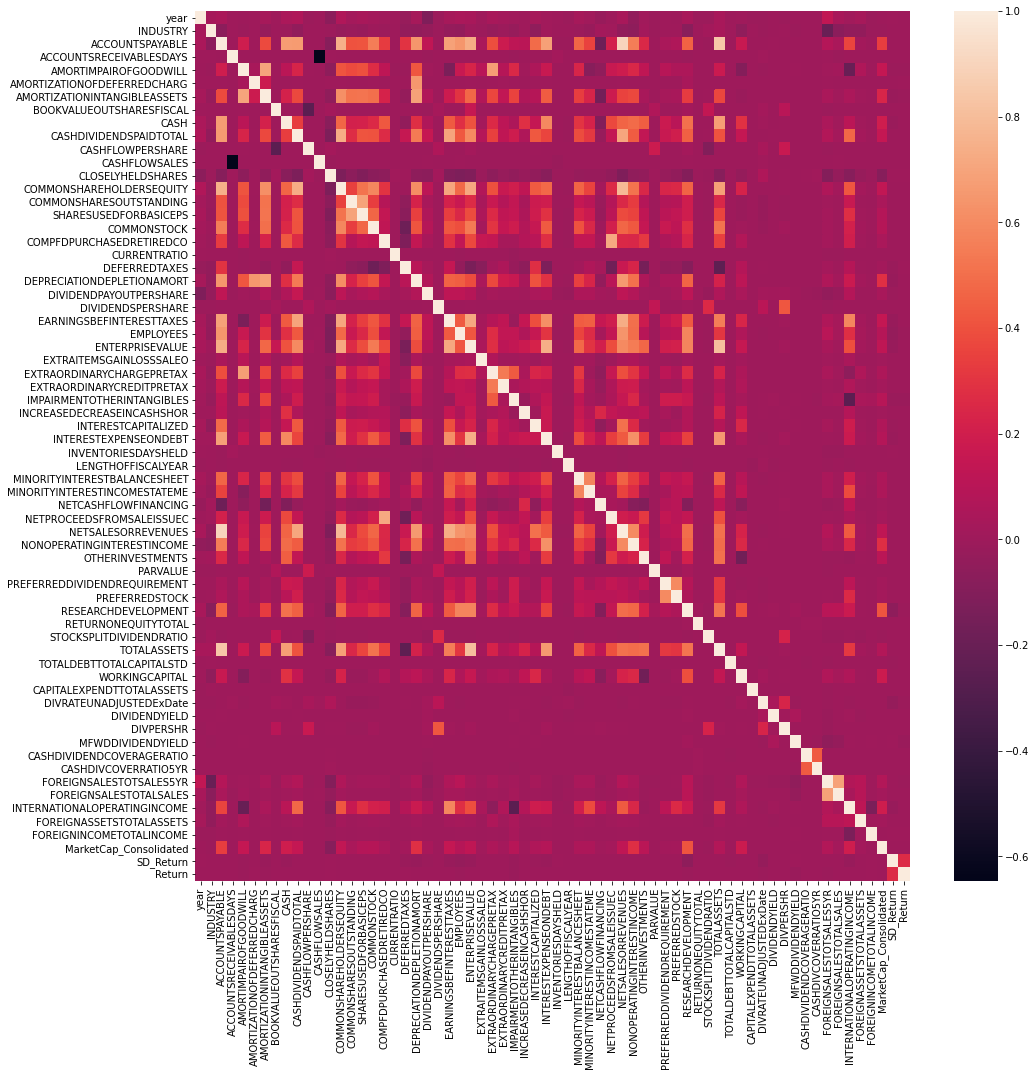

In [173]:
#Heatmap to reduce dimensions for knn-imputation and classification and while performing FA
plt.figure(figsize = (16,16))
sns.heatmap(df.corr())

In [174]:
#Missing values by percentage
missing = df.isnull().sum()/len(df)*100
missing.sort_values(ascending = False)

IMPAIRMENTOTHERINTANGIBLES       92.404601
AMORTIMPAIROFGOODWILL            80.078551
RESEARCHDEVELOPMENT              77.479987
FOREIGNINCOMETOTALINCOME         72.035596
CASHDIVCOVERRATIO5YR             70.260378
INTERNATIONALOPERATINGINCOME     67.233832
STOCKSPLITDIVIDENDRATIO          66.751698
FOREIGNSALESTOTSALES5YR          62.206985
FOREIGNASSETSTOTALASSETS         61.077004
AMORTIZATIONOFDEFERREDCHARG      55.383391
DIVRATEUNADJUSTEDExDate          55.091762
MFWDDIVIDENDYIELD                53.509659
CASHDIVIDENDCOVERAGERATIO        52.987728
AMORTIZATIONINTANGIBLEASSETS     51.949738
FOREIGNSALESTOTALSALES           42.385355
INVENTORIESDAYSHELD              36.760245
INTERESTCAPITALIZED              33.749356
CLOSELYHELDSHARES                32.155509
COMPFDPURCHASEDRETIREDCO         30.846768
PARVALUE                         29.149840
ACCOUNTSRECEIVABLESDAYS          27.007966
NONOPERATINGINTERESTINCOME       26.979260
ACCOUNTSPAYABLE                  26.037175
CASH       

In [175]:
#According to our threshold of 20% of missing values, we are dropping out the variables above 20%:
df = df.drop(["IMPAIRMENTOTHERINTANGIBLES", "AMORTIMPAIROFGOODWILL", "RESEARCHDEVELOPMENT", "FOREIGNINCOMETOTALINCOME",
              "CASHDIVCOVERRATIO5YR", "INTERNATIONALOPERATINGINCOME", "STOCKSPLITDIVIDENDRATIO", "FOREIGNSALESTOTSALES5YR",
              "FOREIGNASSETSTOTALASSETS", "AMORTIZATIONOFDEFERREDCHARG", "DIVRATEUNADJUSTEDExDate",
              "MFWDDIVIDENDYIELD", "CASHDIVIDENDCOVERAGERATIO", "AMORTIZATIONINTANGIBLEASSETS",
             "FOREIGNSALESTOTALSALES", "INVENTORIESDAYSHELD", "INTERESTCAPITALIZED", "CLOSELYHELDSHARES",
              "COMPFDPURCHASEDRETIREDCO", "PARVALUE", "ACCOUNTSRECEIVABLESDAYS", "NONOPERATINGINTERESTINCOME",
              "ACCOUNTSPAYABLE", "CASH","DEFERREDTAXES", "NETPROCEEDSFROMSALEISSUEC", "OTHERINVESTMENTS",
              "MarketCap_Consolidated", "EXTRAORDINARYCREDITPRETAX", "CURRENTRATIO"], axis=1)

In [176]:
df

year                                      NAME  \
0       2001  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
1       2002  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
2       2003  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
3       2000               SSH COMMUNICATIONS SECURITY   
4       2001               SSH COMMUNICATIONS SECURITY   
...      ...                                       ...   
153272  1996              PWS HOLDINGS DEAD - 11/09/00   
153273  1997              PWS HOLDINGS DEAD - 11/09/00   
153274  1998              PWS HOLDINGS DEAD - 11/09/00   
153275  1999              PWS HOLDINGS DEAD - 11/09/00   
153276  2000              PWS HOLDINGS DEAD - 11/09/00   

                              ONLY NAME  INDUSTRY           GEOGN  \
0        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
1        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
2        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
3       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
4       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
...                                 ...       ...             ...   
153272                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153273                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153274                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153275                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153276                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   

        BOOKVALUEOUTSHARESFISCAL  CASHDIVIDENDSPAIDTOTAL  CASHFLOWPERSHARE  \
0                          1.363                     0.0            -3.269   
1                          1.322                     0.0            -3.029   
2                          1.264                     0.0            -0.669   
3                          1.958                     0.0            -0.158   
4                          1.802                     0.0            -0.179   
...                          ...                     ...               ...   
153272                    -0.064                   232.0             0.067   
153273                    -0.031                   424.0             0.052   
153274                     0.001                   336.0             0.058   
153275                     0.078                   395.0             0.056   
153276                       NaN                     NaN               NaN   

        CASHFLOWSALES  COMMONSHAREHOLDERSEQUITY  COMMONSHARESOUTSTANDING  \
0             -971.78                    6272.0                   4600.0   
1             -269.08                    6042.0                   4572.0   
2              -43.93                    5779.0                   4572.0   
3              -24.36                   54007.0                  27578.0   
4              -24.74                   49900.0                  27691.0   
...               ...                       ...                      ...   
153272          14.72                   -2010.0                  31200.0   
153273           9.83                    -979.0                  31200.0   
153274          11.83                      34.0                  32200.0   
153275           9.07                    2500.0                  32200.0   
153276            NaN                       NaN                      NaN   

        SHARESUSEDFORBASICEPS  COMMONSTOCK  DEPRECIATIONDEPLETIONAMORT  \
0                      3918.0        150.0                         NaN   
1                      3918.0        141.0                        89.0   
2                      3918.0        131.0                       132.0   
3                     24083.0          NaN                       410.0   
4                     27379.0        831.0                       913.0   
...                       ...          ...                         ...   
153272                31199.0       4200.0                       520.0   
153273                31199.0       4707

In [177]:
#Missing values by percentage
missing = df.isnull().sum()/len(df)*100
missing.sort_values(ascending = False)

WORKINGCAPITAL                   19.992562
CAPITALEXPENDTTOTALASSETS        18.397411
DIVIDENDPAYOUTPERSHARE           18.194511
Return                           18.129269
NETCASHFLOWFINANCING             17.632130
INCREASEDECREASEINCASHSHOR       17.542097
ENTERPRISEVALUE                  16.627413
EMPLOYEES                        15.480470
EXTRAORDINARYCHARGEPRETAX        15.226029
SD_Return                        14.299601
RETURNONEQUITYTOTAL              12.946496
DIVIDENDYIELD                    12.068347
DIVPERSHR                        11.584256
COMMONSTOCK                      10.999041
MINORITYINTERESTINCOMESTATEME    10.544961
CASHDIVIDENDSPAIDTOTAL            9.052239
DIVIDENDSPERSHARE                 8.944591
EXTRAITEMSGAINLOSSSALEO           8.721465
DEPRECIATIONDEPLETIONAMORT        8.404392
LENGTHOFFISCALYEAR                8.072314
CASHFLOWSALES                     7.627367
SHARESUSEDFORBASICEPS             7.462959
EARNINGSBEFINTERESTTAXES          6.854257
INTERESTEXP

<AxesSubplot:>

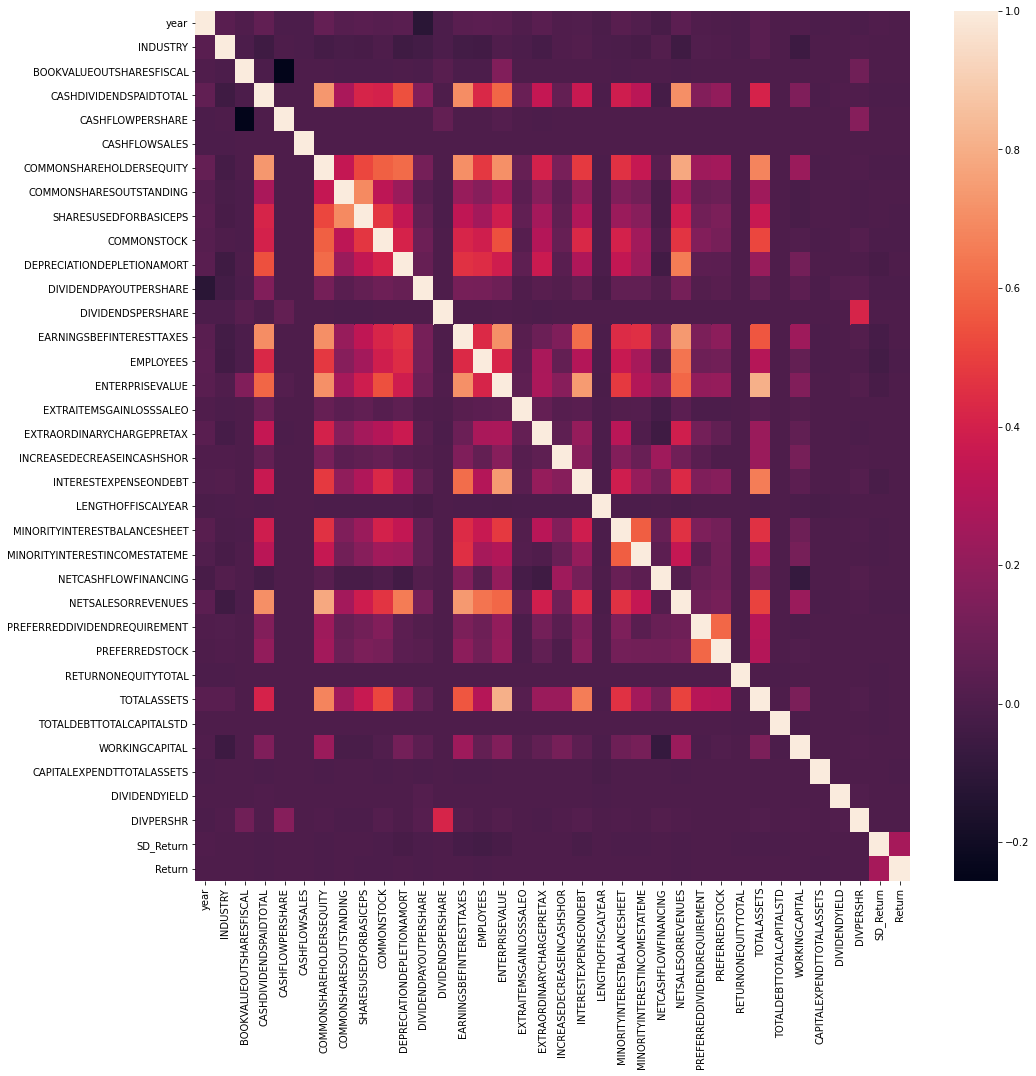

In [178]:
#Heatmap to reduce dimensions for knn-imputation and classification and while performing FA
plt.figure(figsize = (16,16))
sns.heatmap(df.corr())

In [179]:
#Correlations
pd.set_option("max_rows", 5000)
corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)
#The variables that still have the correlation above 0.75 cant be excluded because we need them for the calculation
#and data transformation, bit the variable "ENTERPRISEVALUE" and "COMMONSHAREHOLDERSEQUITY" can be removed,
#then we will not have any correlation above 0.75 anymore

Return                         Return                           1.000000e+00
PREFERREDDIVIDENDREQUIREMENT   PREFERREDDIVIDENDREQUIREMENT     1.000000e+00
INTERESTEXPENSEONDEBT          INTERESTEXPENSEONDEBT            1.000000e+00
LENGTHOFFISCALYEAR             LENGTHOFFISCALYEAR               1.000000e+00
MINORITYINTERESTBALANCESHEET   MINORITYINTERESTBALANCESHEET     1.000000e+00
MINORITYINTERESTINCOMESTATEME  MINORITYINTERESTINCOMESTATEME    1.000000e+00
NETCASHFLOWFINANCING           NETCASHFLOWFINANCING             1.000000e+00
NETSALESORREVENUES             NETSALESORREVENUES               1.000000e+00
PREFERREDSTOCK                 PREFERREDSTOCK                   1.000000e+00
EXTRAORDINARYCHARGEPRETAX      EXTRAORDINARYCHARGEPRETAX        1.000000e+00
RETURNONEQUITYTOTAL            RETURNONEQUITYTOTAL              1.000000e+00
TOTALASSETS                    TOTALASSETS                      1.000000e+00
TOTALDEBTTOTALCAPITALSTD       TOTALDEBTTOTALCAPITALSTD         1.000000e+00

In [180]:
#Dropping out "ENTERPRISEVALUE" and "COMMONSHAREHOLDERSEQUITY"
df = df.drop(["COMMONSHAREHOLDERSEQUITY", "ENTERPRISEVALUE"], axis=1)

In [181]:
df

year                                      NAME  \
0       2001  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
1       2002  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
2       2003  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
3       2000               SSH COMMUNICATIONS SECURITY   
4       2001               SSH COMMUNICATIONS SECURITY   
...      ...                                       ...   
153272  1996              PWS HOLDINGS DEAD - 11/09/00   
153273  1997              PWS HOLDINGS DEAD - 11/09/00   
153274  1998              PWS HOLDINGS DEAD - 11/09/00   
153275  1999              PWS HOLDINGS DEAD - 11/09/00   
153276  2000              PWS HOLDINGS DEAD - 11/09/00   

                              ONLY NAME  INDUSTRY           GEOGN  \
0        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
1        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
2        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
3       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
4       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
...                                 ...       ...             ...   
153272                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153273                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153274                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153275                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153276                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   

        BOOKVALUEOUTSHARESFISCAL  CASHDIVIDENDSPAIDTOTAL  CASHFLOWPERSHARE  \
0                          1.363                     0.0            -3.269   
1                          1.322                     0.0            -3.029   
2                          1.264                     0.0            -0.669   
3                          1.958                     0.0            -0.158   
4                          1.802                     0.0            -0.179   
...                          ...                     ...               ...   
153272                    -0.064                   232.0             0.067   
153273                    -0.031                   424.0             0.052   
153274                     0.001                   336.0             0.058   
153275                     0.078                   395.0             0.056   
153276                       NaN                     NaN               NaN   

        CASHFLOWSALES  COMMONSHARESOUTSTANDING  SHARESUSEDFORBASICEPS  \
0             -971.78                   4600.0                 3918.0   
1             -269.08                   4572.0                 3918.0   
2              -43.93                   4572.0                 3918.0   
3              -24.36                  27578.0                24083.0   
4              -24.74                  27691.0                27379.0   
...               ...                      ...                    ...   
153272          14.72                  31200.0                31199.0   
153273           9.83                  31200.0                31199.0   
153274          11.83                  32200.0                31574.0   
153275           9.07                  32200.0                32199.0   
153276            NaN                      NaN                    NaN   

        COMMONSTOCK  DEPRECIATIONDEPLETIONAMORT  DIVIDENDPAYOUTPERSHARE  \
0             150.0                         NaN                    0.00   
1             141.0                        89.0                    0.00   
2             131.0                       132.0                    0.00   
3               NaN                       410.0                    0.00   
4             831.0                       913.0                    0.00   
...             ...                         ...                     ...   
153272       4200.0                       520.0                   39.39   
153273       4707.0                       548.0                   33

In [182]:
#Correlations
pd.set_option("max_rows", 5000)
corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

Return                         Return                           1.000000e+00
INCREASEDECREASEINCASHSHOR     INCREASEDECREASEINCASHSHOR       1.000000e+00
DIVIDENDYIELD                  DIVIDENDYIELD                    1.000000e+00
CAPITALEXPENDTTOTALASSETS      CAPITALEXPENDTTOTALASSETS        1.000000e+00
WORKINGCAPITAL                 WORKINGCAPITAL                   1.000000e+00
TOTALDEBTTOTALCAPITALSTD       TOTALDEBTTOTALCAPITALSTD         1.000000e+00
TOTALASSETS                    TOTALASSETS                      1.000000e+00
RETURNONEQUITYTOTAL            RETURNONEQUITYTOTAL              1.000000e+00
PREFERREDSTOCK                 PREFERREDSTOCK                   1.000000e+00
PREFERREDDIVIDENDREQUIREMENT   PREFERREDDIVIDENDREQUIREMENT     1.000000e+00
NETSALESORREVENUES             NETSALESORREVENUES               1.000000e+00
NETCASHFLOWFINANCING           NETCASHFLOWFINANCING             1.000000e+00
MINORITYINTERESTINCOMESTATEME  MINORITYINTERESTINCOMESTATEME    1.000000e+00

<AxesSubplot:>

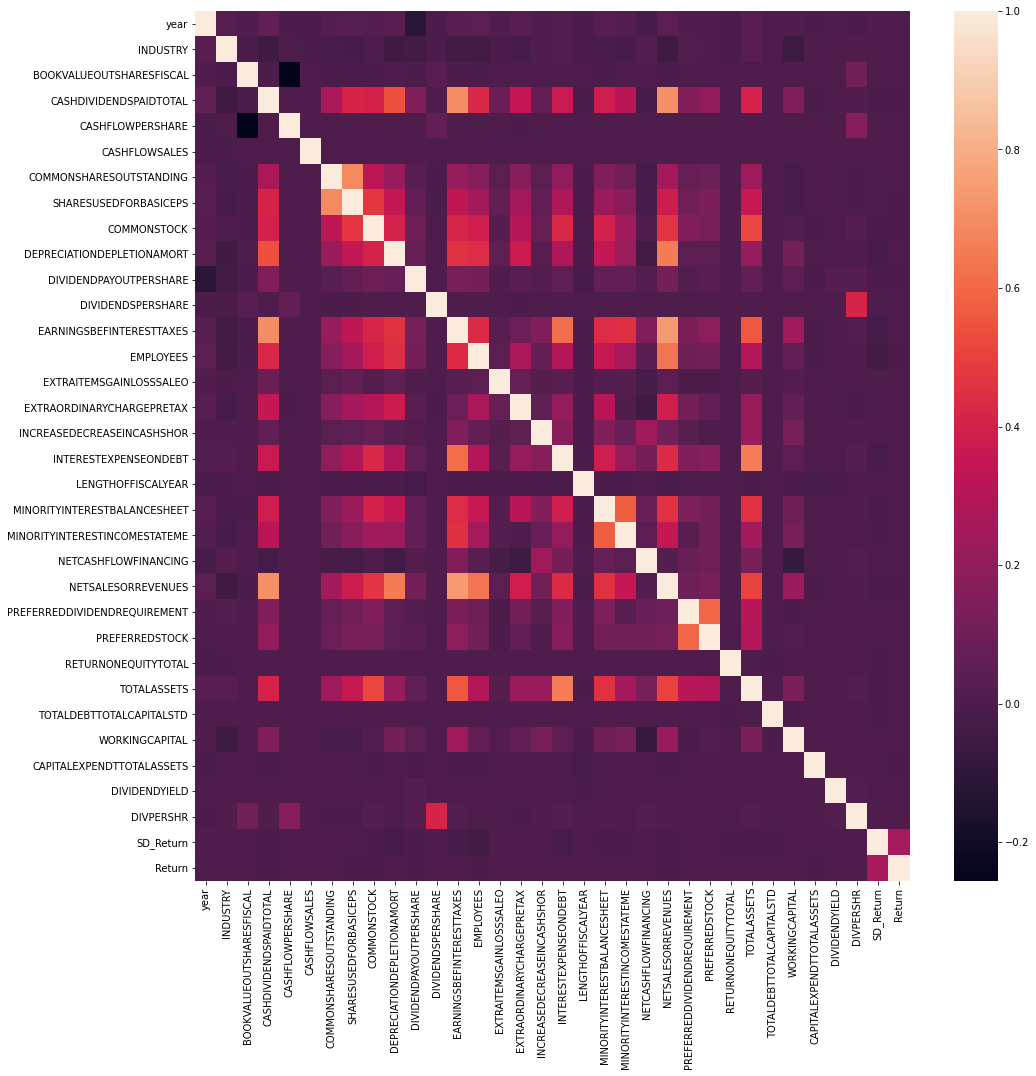

In [183]:
#Heatmap to reduce dimensions for knn-imputation and classification and while performing FA
plt.figure(figsize = (16,16))
sns.heatmap(df.corr())
#No correlation above 0.75 (excluding 1.0)

In [184]:
pd.set_option("max_columns", 5000)
df

year                                      NAME  \
0       2001  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
1       2002  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
2       2003  DYNAMIC COML.FIN. DEAD - DELIST 23/09/04   
3       2000               SSH COMMUNICATIONS SECURITY   
4       2001               SSH COMMUNICATIONS SECURITY   
...      ...                                       ...   
153272  1996              PWS HOLDINGS DEAD - 11/09/00   
153273  1997              PWS HOLDINGS DEAD - 11/09/00   
153274  1998              PWS HOLDINGS DEAD - 11/09/00   
153275  1999              PWS HOLDINGS DEAD - 11/09/00   
153276  2000              PWS HOLDINGS DEAD - 11/09/00   

                              ONLY NAME  INDUSTRY           GEOGN  \
0        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
1        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
2        DYNAMIC COMMERCIAL FINANCE PLC    7389.0  UNITED KINGDOM   
3       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
4       SSH COMMUNICATIONS SECURITY OYJ    7372.0         FINLAND   
...                                 ...       ...             ...   
153272                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153273                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153274                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153275                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   
153276                 PWS HOLDINGS PLC    6411.0  UNITED KINGDOM   

        BOOKVALUEOUTSHARESFISCAL  CASHDIVIDENDSPAIDTOTAL  CASHFLOWPERSHARE  \
0                          1.363                     0.0            -3.269   
1                          1.322                     0.0            -3.029   
2                          1.264                     0.0            -0.669   
3                          1.958                     0.0            -0.158   
4                          1.802                     0.0            -0.179   
...                          ...                     ...               ...   
153272                    -0.064                   232.0             0.067   
153273                    -0.031                   424.0             0.052   
153274                     0.001                   336.0             0.058   
153275                     0.078                   395.0             0.056   
153276                       NaN                     NaN               NaN   

        CASHFLOWSALES  COMMONSHARESOUTSTANDING  SHARESUSEDFORBASICEPS  \
0             -971.78                   4600.0                 3918.0   
1             -269.08                   4572.0                 3918.0   
2              -43.93                   4572.0                 3918.0   
3              -24.36                  27578.0                24083.0   
4              -24.74                  27691.0                27379.0   
...               ...                      ...                    ...   
153272          14.72                  31200.0                31199.0   
153273           9.83                  31200.0                31199.0   
153274          11.83                  32200.0                31574.0   
153275           9.07                  32200.0                32199.0   
153276            NaN                      NaN                    NaN   

        COMMONSTOCK  DEPRECIATIONDEPLETIONAMORT  DIVIDENDPAYOUTPERSHARE  \
0             150.0                         NaN                    0.00   
1             141.0                        89.0                    0.00   
2             131.0                       132.0                    0.00   
3               NaN                       410.0                    0.00   
4             831.0                       913.0                    0.00   
...             ...                         ...                     ...   
153272       4200.0                       520.0                   39.39   
153273       4707.0                       548.0                   33

In [185]:
# Checking for datatypes. We need to include only the numerical values both for data transformation andb to the Knn imputer and not Objects (dtype 'O')-
df.dtypes.to_dict()

{'year': dtype('int64'),
 'NAME': dtype('O'),
 'ONLY NAME': dtype('O'),
 'INDUSTRY': dtype('float64'),
 'GEOGN': dtype('O'),
 'BOOKVALUEOUTSHARESFISCAL': dtype('float64'),
 'CASHDIVIDENDSPAIDTOTAL': dtype('float64'),
 'CASHFLOWPERSHARE': dtype('float64'),
 'CASHFLOWSALES': dtype('float64'),
 'COMMONSHARESOUTSTANDING': dtype('float64'),
 'SHARESUSEDFORBASICEPS': dtype('float64'),
 'COMMONSTOCK': dtype('float64'),
 'DEPRECIATIONDEPLETIONAMORT': dtype('float64'),
 'DIVIDENDPAYOUTPERSHARE': dtype('float64'),
 'DIVIDENDSPERSHARE': dtype('float64'),
 'EARNINGSBEFINTERESTTAXES': dtype('float64'),
 'EMPLOYEES': dtype('float64'),
 'EXTRAITEMSGAINLOSSSALEO': dtype('float64'),
 'EXTRAORDINARYCHARGEPRETAX': dtype('float64'),
 'INCREASEDECREASEINCASHSHOR': dtype('float64'),
 'INTERESTEXPENSEONDEBT': dtype('float64'),
 'LENGTHOFFISCALYEAR': dtype('float64'),
 'MINORITYINTERESTBALANCESHEET': dtype('float64'),
 'MINORITYINTERESTINCOMESTATEME': dtype('float64'),
 'NETCASHFLOWFINANCING': dtype('float64'

In [193]:
# Including all numercial values in "num"
num = [col for col in df.columns if df[col].dtypes == 'float64']
Ndf = df[num]
saved_cols = Ndf.columns
df[num]

INDUSTRY  BOOKVALUEOUTSHARESFISCAL  CASHDIVIDENDSPAIDTOTAL  \
0         7389.0                     1.363                     0.0   
1         7389.0                     1.322                     0.0   
2         7389.0                     1.264                     0.0   
3         7372.0                     1.958                     0.0   
4         7372.0                     1.802                     0.0   
...          ...                       ...                     ...   
153272    6411.0                    -0.064                   232.0   
153273    6411.0                    -0.031                   424.0   
153274    6411.0                     0.001                   336.0   
153275    6411.0                     0.078                   395.0   
153276    6411.0                       NaN                     NaN   

        CASHFLOWPERSHARE  CASHFLOWSALES  COMMONSHARESOUTSTANDING  \
0                 -3.269        -971.78                   4600.0   
1                 -3.029        -269.08                   4572.0   
2                 -0.669         -43.93                   4572.0   
3                 -0.158         -24.36                  27578.0   
4                 -0.179         -24.74                  27691.0   
...                  ...            ...                      ...   
153272             0.067          14.72                  31200.0   
153273             0.052           9.83                  31200.0   
153274             0.058          11.83                  32200.0   
153275             0.056           9.07                  32200.0   
153276               NaN            NaN                      NaN   

        SHARESUSEDFORBASICEPS  COMMONSTOCK  DEPRECIATIONDEPLETIONAMORT  \
0                      3918.0        150.0                         NaN   
1                      3918.0        141.0                        89.0   
2                      3918.0        131.0                       132.0   
3                     24083.0          NaN                       410.0   
4                     27379.0        831.0                       913.0   
...                       ...          ...                         ...   
153272                31199.0       4200.0                       520.0   
153273                31199.0       4707.0                       548.0   
153274                31574.0       4562.0                       436.0   
153275                32199.0       5177.0                       682.0   
153276                    NaN          NaN                         NaN   

        DIVIDENDPAYOUTPERSHARE  DIVIDENDSPERSHARE  EARNINGSBEFINTERESTTAXES  \
0                         0.00              0.000                    -686.0   
1                         0.00              0.000                     667.0   
2                         0.00              0.000                    1317.0   
3                         0.00              0.000                   -2460.0   
4                         0.00              0.000                   -4094.0   
...                        ...                ...                       ...   
153272                   39.39              0.009                    1307.0   
153273                   33.78              0.011                    1810.0   
153274                   34.63              0.011                    1723.0   
153275                   36.17              0.014                    1907.0   
153276                     NaN                NaN                       NaN   

        EMPLOYEES  EXTRAITEMSGAINLOSSSALEO  EXTRAORDINARYCHARGEPRETAX  \
0            12.0                      0.0                        0.0   
1            26.0                      0.0                        0.0   
2            36.0                      0.0                        0.0   
3           172.0                      0.0                        NaN   
4           181.0                      0.0                        0.0   
...           ...                      ...                        ...   
1

In [187]:
# Checking fo datatypes again to re check. We can now use df[num] in both Standard Scalar and Knn imputor as well-
df[num].dtypes.to_dict()

{'INDUSTRY': dtype('float64'),
 'BOOKVALUEOUTSHARESFISCAL': dtype('float64'),
 'CASHDIVIDENDSPAIDTOTAL': dtype('float64'),
 'CASHFLOWPERSHARE': dtype('float64'),
 'CASHFLOWSALES': dtype('float64'),
 'COMMONSHARESOUTSTANDING': dtype('float64'),
 'SHARESUSEDFORBASICEPS': dtype('float64'),
 'COMMONSTOCK': dtype('float64'),
 'DEPRECIATIONDEPLETIONAMORT': dtype('float64'),
 'DIVIDENDPAYOUTPERSHARE': dtype('float64'),
 'DIVIDENDSPERSHARE': dtype('float64'),
 'EARNINGSBEFINTERESTTAXES': dtype('float64'),
 'EMPLOYEES': dtype('float64'),
 'EXTRAITEMSGAINLOSSSALEO': dtype('float64'),
 'EXTRAORDINARYCHARGEPRETAX': dtype('float64'),
 'INCREASEDECREASEINCASHSHOR': dtype('float64'),
 'INTERESTEXPENSEONDEBT': dtype('float64'),
 'LENGTHOFFISCALYEAR': dtype('float64'),
 'MINORITYINTERESTBALANCESHEET': dtype('float64'),
 'MINORITYINTERESTINCOMESTATEME': dtype('float64'),
 'NETCASHFLOWFINANCING': dtype('float64'),
 'NETSALESORREVENUES': dtype('float64'),
 'PREFERREDDIVIDENDREQUIREMENT': dtype('float64'),

In [209]:
df.describe()

year       INDUSTRY  BOOKVALUEOUTSHARESFISCAL  \
count  153277.000000  153171.000000              1.451990e+05   
mean     2006.241093    4940.824849              1.228764e+04   
std         7.226399    2115.419744              2.074867e+06   
min      1994.000000     100.000000             -7.952137e+05   
25%      2000.000000    3317.000000              6.460000e-01   
50%      2006.000000    4953.000000              2.672000e+00   
75%      2012.000000    6531.000000              1.066950e+01   
max      2019.000000    9999.000000              5.380000e+08   

       CASHDIVIDENDSPAIDTOTAL  CASHFLOWPERSHARE  CASHFLOWSALES  \
count            1.394020e+05      1.451720e+05   1.415860e+05   
mean             4.698251e+04     -3.542353e+02  -1.141009e+03   
std              3.043807e+05      2.504253e+05   2.575614e+05   
min             -2.760000e+02     -6.922716e+07  -8.281310e+07   
25%              0.000000e+00      9.000000e-03   1.772500e+00   
50%              4.650000e+02      3.420000e-01   7.720000e+00   
75%              7.486000e+03      1.813000e+00   1.578000e+01   
max              1.921300e+07      2.430542e+07   3.042580e+07   

       COMMONSHARESOUTSTANDING  SHARESUSEDFORBASICEPS   COMMONSTOCK  \
count             1.452830e+05           1.418380e+05  1.364180e+05   
mean              1.801191e+05           1.736966e+05  1.137160e+05   
std               1.653344e+06           1.103256e+06  6.065421e+05   
min               0.000000e+00           0.000000e+00 -2.207180e+05   
25%               4.503000e+03           4.563000e+03  1.995000e+03   
50%               2.048100e+04           2.014700e+04  8.725000e+03   
75%               8.399200e+04           8.227000e+04  3.829900e+04   
max               4.560000e+08           1.100000e+08  2.787100e+07   

       DEPRECIATIONDEPLETIONAMORT  DIVIDENDPAYOUTPERSHARE  DIVIDENDSPERSHARE  \
count                1.403950e+05           125389.000000       1.395670e+05   
mean                 8.235870e+04               22.596191       3.148037e+01   
std                  6.406622e+05               27.297809       5.627668e+03   
min                 -1.395400e+04                0.000000       0.000000e+00   
25%                  4.950000e+02                0.000000       0.000000e+00   
50%                  2.906000e+03                9.180000       3.100000e-02   
75%                  1.732950e+04               40.770000       3.290000e-01   
max                  1.300000e+08              100.000000       2.016649e+06   

       EARNINGSBEFINTERESTTAXES      EMPLOYEES  EXTRAITEMSGAINLOSSSALEO  \
count              1.427710e+05  129549.000000             1.399090e+05   
mean               1.696510e+05    6765.218396             2.485295e+03   
std                1.083592e+06   27782.119169             1.956949e+05   
min               -3.387909e+07       0.000000            -5.169000e+06   
25%               -7.000000e+01      98.000000             0.000000e+00   
50%                4.921000e+03     515.000000             0.000000e+00   
75%                3.783550e+04    2576.000000             0.000000e+00   
max                4.646896e+07  671205.000000             6.004639e+07   

       EXTRAORDINARYCHARGEPRETAX  INCREASEDECREASEINCASHSHOR  \
count               1.299390e+05                1.263890e+05   
mean                3.744505e+04                2.632024e+04   
std                 4.074275e+05                1.171659e+06   
min                -4.539300e+04               -6.331314e+07   
25%                 0.000000e+00               -2.536000e+03   
50%                 1.050000e+02                1.150000e+02   
75%                 3.265000e+03                5.138000e+03   
max                 5.648000e+07                1.050000e+08   

       INTERESTEXPENSEONDEBT  LENGTHOFFISCALYEAR  \
count           1.429120e+05       140904.000000   
mean            5.081271e+04          365.973386   
std             4.117699e+05           18.086989   
min          

In [ ]:
BSlist = ['BOOKVALUEOUTSHARESFISCAL', 'CASHDIVIDENDSPAIDTOTAL', 'COMMONSHARESOUTSTANDING','SHARESUSEDFORBASICEPS', 'COMMONSTOCK',
         'DIVIDENDPAYOUTPERSHARE', 'DIVIDENDSPERSHARE', 'EXTRAORDINARYCHARGEPRETAX', 'MINORITYINTERESTBALANCESHEET', 
          'PREFERREDDIVIDENDREQUIREMENT', 'PREFERREDSTOCK', 'RETURNONEQUITYTOTAL', 'TOTALASSETS', 'TOTALDEBTTOTALCAPITALSTD',
          'WORKINGCAPITAL', 'CAPITALEXPENDTTOTALASSETS', 'DIVIDENDYIELD', 'DIVPERSHR']
          

PLCFlist = ['CASHFLOWPERSHARE', 'CASHFLOWSALES', 'DEPRECIATIONDEPLETIONAMORT', 'EARNINGSBEFINTERESTTAXES','EXTRAITEMSGAINLOSSSALEO', 
            'INTERESTEXPENSEONDEBT', 'MINORITYINTERESTINCOMESTATEME', 'NETCASHFLOWFINANCING', 'INCREASEDECREASEINCASHSHOR',
            'NETSALESORREVENUES', 'SD_Return', 'Return']


EMPLOYEES
LENGTHOFFISCALYEAR
COUNTRY

In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(Ndf), index=Ndf.index, columns=Ndf.columns)
pd.DataFrame(scaled_data)

INDUSTRY  BOOKVALUEOUTSHARESFISCAL  CASHDIVIDENDSPAIDTOTAL  \
0       0.736337                  0.001476                0.000014   
1       0.736337                  0.001476                0.000014   
2       0.736337                  0.001476                0.000014   
3       0.734620                  0.001476                0.000014   
4       0.734620                  0.001476                0.000014   
...          ...                       ...                     ...   
153272  0.637539                  0.001476                0.000026   
153273  0.637539                  0.001476                0.000036   
153274  0.637539                  0.001476                0.000032   
153275  0.637539                  0.001476                0.000035   
153276  0.637539                       NaN                     NaN   

        CASHFLOWPERSHARE  CASHFLOWSALES  COMMONSHARESOUTSTANDING  \
0               0.740139       0.731305                 0.000010   
1               0.740139       0.731311                 0.000010   
2               0.740139       0.731313                 0.000010   
3               0.740139       0.731313                 0.000060   
4               0.740139       0.731313                 0.000061   
...                  ...            ...                      ...   
153272          0.740139       0.731313                 0.000068   
153273          0.740139       0.731313                 0.000068   
153274          0.740139       0.731313                 0.000071   
153275          0.740139       0.731313                 0.000071   
153276               NaN            NaN                      NaN   

        SHARESUSEDFORBASICEPS  COMMONSTOCK  DEPRECIATIONDEPLETIONAMORT  \
0                    0.000036     0.007862                         NaN   
1                    0.000036     0.007862                    0.000108   
2                    0.000036     0.007862                    0.000108   
3                    0.000219          NaN                    0.000110   
4                    0.000249     0.007887                    0.000114   
...                       ...          ...                         ...   
153272               0.000284     0.008007                    0.000111   
153273               0.000284     0.008025                    0.000112   
153274               0.000287     0.008019                    0.000111   
153275               0.000293     0.008041                    0.000113   
153276                    NaN          NaN                         NaN   

        DIVIDENDPAYOUTPERSHARE  DIVIDENDSPERSHARE  EARNINGSBEFINTERESTTAXES  \
0                       0.0000       0.000000e+00                  0.421646   
1                       0.0000       0.000000e+00                  0.421663   
2                       0.0000       0.000000e+00                  0.421671   
3                       0.0000       0.000000e+00                  0.421624   
4                       0.0000       0.000000e+00                  0.421603   
...                        ...                ...                       ...   
153272                  0.3939       4.462849e-09                  0.421670   
153273                  0.3378       5.454593e-09                  0.421677   
153274                  0.3463       5.454593e-09                  0.421676   
153275                  0.3617       6.942210e-09                  0.421678   
153276                     NaN                NaN                       NaN   

        EMPLOYEES  EXTRAITEMSGAINLOSSSALEO  EXTRAORDINARYCHARGEPRETAX  \
0        0.000018                  0.07926                   0.000803   
1        0.000039                  0.07926                   0.000803   
2        0.000054                  0.07926                   0.000803   
3        0.000256                  0.07926                        NaN   
4        0.000270                  0.07926                   0.000803   
...           ...                      ...                        ...   
1

In [202]:
# Keeping the Headers 0, since it is required in the kNN imputer-
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(Ndf))
pd.DataFrame(scaled_data)

0         1         2         3         4         5         6   \
0       0.736337  0.001476  0.000014  0.740139  0.731305  0.000010  0.000036   
1       0.736337  0.001476  0.000014  0.740139  0.731311  0.000010  0.000036   
2       0.736337  0.001476  0.000014  0.740139  0.731313  0.000010  0.000036   
3       0.734620  0.001476  0.000014  0.740139  0.731313  0.000060  0.000219   
4       0.734620  0.001476  0.000014  0.740139  0.731313  0.000061  0.000249   
...          ...       ...       ...       ...       ...       ...       ...   
153272  0.637539  0.001476  0.000026  0.740139  0.731313  0.000068  0.000284   
153273  0.637539  0.001476  0.000036  0.740139  0.731313  0.000068  0.000284   
153274  0.637539  0.001476  0.000032  0.740139  0.731313  0.000071  0.000287   
153275  0.637539  0.001476  0.000035  0.740139  0.731313  0.000071  0.000293   
153276  0.637539       NaN       NaN       NaN       NaN       NaN       NaN   

              7         8       9             10        11        12       13  \
0       0.007862       NaN  0.0000  0.000000e+00  0.421646  0.000018  0.07926   
1       0.007862  0.000108  0.0000  0.000000e+00  0.421663  0.000039  0.07926   
2       0.007862  0.000108  0.0000  0.000000e+00  0.421671  0.000054  0.07926   
3            NaN  0.000110  0.0000  0.000000e+00  0.421624  0.000256  0.07926   
4       0.007887  0.000114  0.0000  0.000000e+00  0.421603  0.000270  0.07926   
...          ...       ...     ...           ...       ...       ...      ...   
153272  0.008007  0.000111  0.3939  4.462849e-09  0.421670  0.000316  0.07926   
153273  0.008025  0.000112  0.3378  5.454593e-09  0.421677  0.000334  0.07926   
153274  0.008019  0.000111  0.3463  5.454593e-09  0.421676  0.000344  0.07926   
153275  0.008041  0.000113  0.3617  6.942210e-09  0.421678  0.000334  0.07926   
153276       NaN       NaN     NaN           NaN       NaN       NaN      NaN   

              14        15        16        17        18        19        20  \
0       0.000803  0.376164  0.003697       NaN       NaN  0.669603  0.547232   
1       0.000803  0.376166  0.003711  0.497024  0.030169  0.669603  0.547230   
2       0.000803  0.376159  0.003716  0.497024  0.030169  0.669603  0.547210   
3            NaN  0.376373  0.003691       NaN  0.030169       NaN  0.547286   
4       0.000803  0.376124  0.003690  0.497024  0.030169  0.669603  0.547206   
...          ...       ...       ...       ...       ...       ...       ...   
153272  0.000803  0.376192  0.003697  0.498512  0.030168  0.669605  0.547203   
153273  0.000830  0.376162  0.003695  0.497024  0.030167  0.669603  0.547200   
153274  0.000804  0.376165  0.003689  0.497024  0.030168  0.669606  0.547206   
153275  0.000807  0.376227  0.003689  0.497024  0.030168  0.669603  0.547205   
153276       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              21   22        23        24        25        26        27  \
0       0.054791  0.0  0.000091       NaN  0.000005       NaN       NaN   
1       0.054799  0.0  0.000091  0.973506  0.000009  0.186804       NaN   
2       0.054803  0.0  0.000090  0.973506  0.000010  0.186805       NaN   
3       0.054828  0.0  0.000083       NaN  0.000023  0.186757  0.565091   
4       0.054839  0.0  0.000083  0.973506  0.000022  0.186757  0.565060   
...          ...  ...       ...       ...       ...       ...       ...   
153272  0.054824  0.0  0.000083       NaN  0.000129  0.187041  0.564755   
153273  0.054830  0.0  0.000083       NaN  0.000104  0.186757  0.564747   
153274  0.054828  0.0  0.000083       NaN  0.000091  0.186757  0.564750   
153275  0.054840  0.0  0.000083  0.973506  0.000132  0.186757  0.564758   
153276       NaN  NaN       NaN       NaN       NaN       NaN       NaN   

             28        29        30        31        32  
0           NaN  0.000000  0.000000  0.000027  0.000022  
1       0.00001  0.000000  0.000000  0.000014  0.000031  
2       0.00001  0.000000  0.000000  0.00002

In [203]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

In [ ]:
# split into input and output elements
kNN_df = scaled_data.values
ix = [i for i in range(kNN_df.shape[1])]
X, y = kNN_df[:, ix], kNN_df[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

In [206]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(scaled_data)

array([[7.36337004e-01, 1.47591330e-03, 1.43650672e-05, ...,
        0.00000000e+00, 2.66383827e-05, 2.23196281e-05],
       [7.36337004e-01, 1.47591323e-03, 1.43650672e-05, ...,
        0.00000000e+00, 1.43903384e-05, 3.08933850e-05],
       [7.36337004e-01, 1.47591312e-03, 1.43650672e-05, ...,
        0.00000000e+00, 2.71207600e-05, 4.68588256e-05],
       ...,
       [6.37539145e-01, 1.47591077e-03, 3.18529750e-05, ...,
        1.53156478e-06, 1.80604345e-05, 3.17890319e-05],
       [6.37539145e-01, 1.47591092e-03, 3.49237683e-05, ...,
        1.53156478e-06, 1.85446409e-05, 5.71964225e-05],
       [6.37539145e-01, 1.47591165e-03, 1.55829750e-05, ...,
        1.53156478e-06, 1.73820881e-05, 5.19563893e-05]])

In [212]:
KNNimp_df = pd.DataFrame(imputer.fit_transform(scaled_data), index=Ndf.index, columns=Ndf.columns)

In [213]:
KNNimp_df.to_csv(r'KNNimp_df.csv', index = False)

In [199]:
pd.DataFrame(scaler.inverse_transform(scaled_data), index=Ndf.index, columns=Ndf.columns)

INDUSTRY  BOOKVALUEOUTSHARESFISCAL  CASHDIVIDENDSPAIDTOTAL  \
0         7389.0                     1.363                     0.0   
1         7389.0                     1.322                     0.0   
2         7389.0                     1.264                     0.0   
3         7372.0                     1.958                     0.0   
4         7372.0                     1.802                     0.0   
...          ...                       ...                     ...   
153272    6411.0                    -0.064                   232.0   
153273    6411.0                    -0.031                   424.0   
153274    6411.0                     0.001                   336.0   
153275    6411.0                     0.078                   395.0   
153276    6411.0                       NaN                     NaN   

        CASHFLOWPERSHARE  CASHFLOWSALES  COMMONSHARESOUTSTANDING  \
0                 -3.269        -971.78                   4600.0   
1                 -3.029        -269.08                   4572.0   
2                 -0.669         -43.93                   4572.0   
3                 -0.158         -24.36                  27578.0   
4                 -0.179         -24.74                  27691.0   
...                  ...            ...                      ...   
153272             0.067          14.72                  31200.0   
153273             0.052           9.83                  31200.0   
153274             0.058          11.83                  32200.0   
153275             0.056           9.07                  32200.0   
153276               NaN            NaN                      NaN   

        SHARESUSEDFORBASICEPS  COMMONSTOCK  DEPRECIATIONDEPLETIONAMORT  \
0                      3918.0        150.0                         NaN   
1                      3918.0        141.0                        89.0   
2                      3918.0        131.0                       132.0   
3                     24083.0          NaN                       410.0   
4                     27379.0        831.0                       913.0   
...                       ...          ...                         ...   
153272                31199.0       4200.0                       520.0   
153273                31199.0       4707.0                       548.0   
153274                31574.0       4562.0                       436.0   
153275                32199.0       5177.0                       682.0   
153276                    NaN          NaN                         NaN   

        DIVIDENDPAYOUTPERSHARE  DIVIDENDSPERSHARE  EARNINGSBEFINTERESTTAXES  \
0                         0.00              0.000                    -686.0   
1                         0.00              0.000                     667.0   
2                         0.00              0.000                    1317.0   
3                         0.00              0.000                   -2460.0   
4                         0.00              0.000                   -4094.0   
...                        ...                ...                       ...   
153272                   39.39              0.009                    1307.0   
153273                   33.78              0.011                    1810.0   
153274                   34.63              0.011                    1723.0   
153275                   36.17              0.014                    1907.0   
153276                     NaN                NaN                       NaN   

        EMPLOYEES  EXTRAITEMSGAINLOSSSALEO  EXTRAORDINARYCHARGEPRETAX  \
0            12.0                      0.0                        0.0   
1            26.0                      0.0                        0.0   
2            36.0                      0.0                        0.0   
3           172.0                      0.0                        NaN   
4           181.0                      0.0                        0.0   
...           ...                      ...                        ...   
1